In [20]:
## source video: https://pyvideo.org/pycon-us-2020/geospatial-public-policy-analysis-with-geopandas.html

### Questions that will be answering

- How many higher education institutions are found in counties with majority underrepresented groups?
  - What are the characteristics of those institutions?
- Are there any counties that don't have any higher education institutions?
  - What are the (demographic) characteristics of those counties?
- What parts of the country are left out if you have a 10, 25, 50 mile radius around higher education institutions?


### Tasks

1. Data preparation
  - Institutions data
  - County level data from census
2. Data analysis
  - RQ 1
  - RQ 2
  - RQ 3

## Data prep institutions

In [10]:
import pandas as pd
from pathlib import Path
from tools import tree
from datetime import datetime as dt
today = dt.today().strftime('%Y_%m_%d')

today

'2021_12_19'

In [11]:
RAW_DATA = Path('./')
INTERIM_DATA = Path('./interim/')
PROCESSED_DATA = Path('./processed/')
FINAL_DATA = Path('./final/')
EXTERNAL_DATA = Path('./external/')

In [23]:
data = pd.read_csv('processed_data.csv')
data.head()

,unitid,institution_name,fips_state_code,sector,institutional_category,street_address,institution_name_alias,institution_name.1,longitude,latitude,...,gradrate_bachelor_degree_6_years_asian,gradrate_bachelor_degree_6_years_native_hawaiian_or_other_pacific_islander,gradrate_bachelor_degree_6_years_black_non-hispanic,gradrate_bachelor_degree_6_years_hispanic,gradrate_bachelor_degree_6_years_white_non-hispanic,gradrate_bachelor_degree_6_years_multirace,gradrate_bachelor_degree_6_years_nonresident_alien,gradrate_bachelor_degree_6_years_race-ethnicity_unknown,pell_grant_recipients_overall_gradrate_150_percent_normal_time,pell_grant_recipients_bachelor_degree_rate_6_years
0,180203,Aaniiih Nakoda College,Montana,"Public, 2-year","Degree-granting, associate's and certificates ...",269 Blackfeet Avenue Agency,,Aaniiih Nakoda College,-108.757816,48.484196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,222178,Abilene Christian University,Texas,"Private not-for-profit, 4-year or above","Degree-granting, primarily baccalaureate or above",,,Abilene Christian University,-99.709797,32.468943,...,14.0,NaN,53.0,52.0,72.0,61.0,79.0,NaN,53.0,53.0
2,138558,Abraham Baldwin Agricultural College,Georgia,"Public, 4-year or above","Degree-granting, not primarily baccalaureate o...",2802 Moore Hwy,ABAC,Abraham Baldwin Agricultural College,-83.528281,31.481889,...,0.0,NaN,43.0,0.0,23.0,NaN,100.0,NaN,18.0,22.0
3,488031,Abraham Lincoln University,California,"Private for-profit, 4-year or above","Degree-granting, primarily baccalaureate or above",100 West Broadway Suite 600,,Abraham Lincoln University,-118.256726,34.146294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,172866,Academy College,Minnesota,"Private for-profit, 4-year or above","Degree-granting, not primarily baccalaureate o...",1600 W. 82nd Street Suite 100,,Academy College,-93.299809,44.855722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [24]:
data.head().T

,0,1,2,3,4
unitid,180203,222178,138558,488031,172866
institution_name,Aaniiih Nakoda College,Abilene Christian University,Abraham Baldwin Agricultural College,Abraham Lincoln University,Academy College
fips_state_code,Montana,Texas,Georgia,California,Minnesota
sector,"Public, 2-year","Private not-for-profit, 4-year or above","Public, 4-year or above","Private for-profit, 4-year or above","Private for-profit, 4-year or above"
institutional_category,"Degree-granting, associate's and certificates ...","Degree-granting, primarily baccalaureate or above","Degree-granting, not primarily baccalaureate o...","Degree-granting, primarily baccalaureate or above","Degree-granting, not primarily baccalaureate o..."
street_address,269 Blackfeet Avenue Agency,,2802 Moore Hwy,100 West Broadway Suite 600,1600 W. 82nd Street Suite 100
institution_name_alias,,,ABAC,,
institution_name.1,Aaniiih Nakoda College,Abilene Christian University,Abraham Baldwin Agricultural College,Abraham Lincoln University,Academy College
longitude,-108.758,-99.7098,-83.5283,-118.257,-93.2998
latitude,48.4842,32.4689,31.4819,34.1463,44.8557


In [25]:
variables_of_interest = [
  'institution_name',
  'longitude',
  'latitude',
  'fips_state_code',
  'sector',
  'total_enrollment',
  'full-time_enrollment',
  'part-time_enrollment'
]

In [26]:
data[variables_of_interest].head()

,institution_name,longitude,latitude,fips_state_code,sector,total_enrollment,full-time_enrollment,part-time_enrollment
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,"Public, 2-year",150.0,108.0,42.0
1,Abilene Christian University,-99.709797,32.468943,Texas,"Private not-for-profit, 4-year or above",5204.0,3730.0,1474.0
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,"Public, 4-year or above",4291.0,2660.0,1631.0
3,Abraham Lincoln University,-118.256726,34.146294,California,"Private for-profit, 4-year or above",217.0,194.0,23.0
4,Academy College,-93.299809,44.855722,Minnesota,"Private for-profit, 4-year or above",99.0,81.0,18.0


In [27]:
working_df = data[variables_of_interest].copy()

In [28]:
# split sector column into two separate categories
working_df['control'] = working_df['sector'].str.split(', ', expand=True)[0]
working_df['level'] = working_df['sector'].str.split(', ', expand=True)[1]

In [29]:
working_df.head()

,institution_name,longitude,latitude,fips_state_code,sector,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,"Public, 2-year",150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,-99.709797,32.468943,Texas,"Private not-for-profit, 4-year or above",5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,"Public, 4-year or above",4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,-118.256726,34.146294,California,"Private for-profit, 4-year or above",217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,-93.299809,44.855722,Minnesota,"Private for-profit, 4-year or above",99.0,81.0,18.0,Private for-profit,4-year or above


In [30]:
# dropping unnecessary column
working_df.drop(columns='sector', inplace=True)

In [31]:
working_df.head()

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,-99.709797,32.468943,Texas,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,-118.256726,34.146294,California,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,-93.299809,44.855722,Minnesota,99.0,81.0,18.0,Private for-profit,4-year or above


In [32]:
working_df.to_csv(PROCESSED_DATA.joinpath('institutions_data.csv'), index=False, encoding='utf-8')

## Data preparation Counties

In [33]:
tree(EXTERNAL_DATA)

+ external
    + processed
        + acs5_2018_race_counties.csv
    + raw
        + acs5_2018_race_counties.csv


In [34]:
data_counties = pd.read_csv(EXTERNAL_DATA / 'processed' / 'acs5_2018_race_counties.csv')

In [35]:
data_counties.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
universe_annotation,NaN,NaN,NaN,NaN,NaN
universe_moe,-5.55556e+08,-5.55556e+08,-5.55556e+08,-5.55556e+08,-5.55556e+08
universe_moe_annotation,*****,*****,*****,*****,*****
white_alone,41412,172768,11898,16801,50232
white_alone_annotation,NaN,NaN,NaN,NaN,NaN
white_alone_moe,59,227,22,22,229
white_alone_moe_annotation,NaN,NaN,NaN,NaN,NaN


In [36]:
[col for col in data_counties.columns if 'moe' not in col and 'annotation' not in col]

['geoid',
 'name',
 'universe',
 'white_alone',
 'black_alone',
 'american_indian_and_alaska_native',
 'asian_alone',
 'native_hawaiian_and_pacific_islander',
 'other_alone',
 'two_or_more_races',
 'latino_alone',
 'state',
 'county',
 'asians_all',
 'other_all']

In [37]:
county_variables_of_interest = [col for col in data_counties.columns if 'moe' not in col and 'annotation' not in col]

In [38]:
county_working_df = data_counties[county_variables_of_interest].copy()

In [39]:
county_working_df.head()

,geoid,name,universe,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,state,county,asians_all,other_all
0,1001,"Autauga County, Alabama",55200.0,41412.0,10475.0,159.0,568.0,5.0,41.0,1012.0,1528.0,1,1,573.0,1212.0
1,1003,"Baldwin County, Alabama",208107.0,172768.0,19529.0,1398.0,1668.0,9.0,410.0,2972.0,9353.0,1,3,1677.0,4780.0
2,1005,"Barbour County, Alabama",25782.0,11898.0,12199.0,63.0,85.0,1.0,86.0,344.0,1106.0,1,5,86.0,493.0
3,1007,"Bibb County, Alabama",22527.0,16801.0,4974.0,8.0,37.0,0.0,0.0,160.0,547.0,1,7,37.0,168.0
4,1009,"Blount County, Alabama",57645.0,50232.0,820.0,124.0,198.0,18.0,174.0,818.0,5261.0,1,9,216.0,1116.0


In [40]:
# export to csv
county_working_df.to_csv(PROCESSED_DATA / 'counties.csv', index=False, encoding='utf-8')

## RESEARCH QUESTION 1
### How many higher education institutions are found in counties with majorit underrepresented groups?
#### What are the characteristics of those institutions?

In [13]:
import geopandas as gpd
#import geoplot as gplt
#import geoplot.crs as gcrs
import matplotlib.pyplot as plt

today

'2021_12_19'

In [14]:
counties_data = pd.read_csv(PROCESSED_DATA / 'counties.csv')
institutions_data = pd.read_csv(PROCESSED_DATA / 'institutions_data.csv')
counties_shapes = gpd.read_file('tl_2019_us_county.shp')

In [43]:
counties_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [44]:
institutions_data.head().T

,0,1,2,3,4
institution_name,Aaniiih Nakoda College,Abilene Christian University,Abraham Baldwin Agricultural College,Abraham Lincoln University,Academy College
longitude,-108.758,-99.7098,-83.5283,-118.257,-93.2998
latitude,48.4842,32.4689,31.4819,34.1463,44.8557
fips_state_code,Montana,Texas,Georgia,California,Minnesota
total_enrollment,150,5204,4291,217,99
full-time_enrollment,108,3730,2660,194,81
part-time_enrollment,42,1474,1631,23,18
control,Public,Private not-for-profit,Public,Private for-profit,Private for-profit
level,2-year,4-year or above,4-year or above,4-year or above,4-year or above


In [45]:
counties_shapes.head().T

,0,1,2,3,4
STATEFP,31,53,35,31,31
COUNTYFP,039,069,011,109,129
COUNTYNS,00835841,01513275,00933054,00835876,00835886
GEOID,31039,53069,35011,31109,31129
NAME,Cuming,Wahkiakum,De Baca,Lancaster,Nuckolls
NAMELSAD,Cuming County,Wahkiakum County,De Baca County,Lancaster County,Nuckolls County
LSAD,06,06,06,06,06
CLASSFP,H1,H1,H1,H1,H1
MTFCC,G4020,G4020,G4020,G4020,G4020
CSAFP,None,None,None,339,None


In [46]:
#counties_shapes.plot()

In [16]:
import us

ModuleNotFoundError: No module named 'us'

In [48]:
[state.fips for state in us.STATES_CONTIGUOUS]

['01',
 '04',
 '05',
 '06',
 '08',
 '09',
 '10',
 '12',
 '13',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '53',
 '54',
 '55',
 '56']

In [49]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]

In [50]:
# grab STATEFP from counties_shapes and check if it's in contiguous_fips list, then return true or false
mask_contiguous_fips = counties_shapes['STATEFP'].isin(contiguous_fips)

In [51]:
# assign the mask to the original dataframe
counties_shapes = counties_shapes[mask_contiguous_fips]

In [52]:
us.states.mapping('name', 'fips')

{'Alabama': '01',
 'Alaska': '02',
 'Arizona': '04',
 'Arkansas': '05',
 'California': '06',
 'Colorado': '08',
 'Connecticut': '09',
 'Delaware': '10',
 'Florida': '12',
 'Georgia': '13',
 'Hawaii': '15',
 'Idaho': '16',
 'Illinois': '17',
 'Indiana': '18',
 'Iowa': '19',
 'Kansas': '20',
 'Kentucky': '21',
 'Louisiana': '22',
 'Maine': '23',
 'Maryland': '24',
 'Massachusetts': '25',
 'Michigan': '26',
 'Minnesota': '27',
 'Mississippi': '28',
 'Missouri': '29',
 'Montana': '30',
 'Nebraska': '31',
 'Nevada': '32',
 'New Hampshire': '33',
 'New Jersey': '34',
 'New Mexico': '35',
 'New York': '36',
 'North Carolina': '37',
 'North Dakota': '38',
 'Ohio': '39',
 'Oklahoma': '40',
 'Oregon': '41',
 'Pennsylvania': '42',
 'Rhode Island': '44',
 'South Carolina': '45',
 'South Dakota': '46',
 'Tennessee': '47',
 'Texas': '48',
 'Utah': '49',
 'Vermont': '50',
 'Virginia': '51',
 'Washington': '53',
 'West Virginia': '54',
 'Wisconsin': '55',
 'Wyoming': '56',
 'American Samoa': '60',
 'G

In [53]:
name_to_fips_map = us.states.mapping('name', 'fips')

In [54]:
institutions_data['fips_state_code'] = institutions_data['fips_state_code'].map(name_to_fips_map)

In [15]:
institutions_data

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,-99.709797,32.468943,Texas,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,-118.256726,34.146294,California,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,-93.299809,44.855722,Minnesota,99.0,81.0,18.0,Private for-profit,4-year or above
...,...,...,...,...,...,...,...,...,...
3746,Youngstown State University,-80.646590,41.104928,Ohio,12607.0,9687.0,2920.0,Public,4-year or above
3747,YTI Career Institute-Altoona,-78.395445,40.485390,Pennsylvania,39.0,39.0,0.0,Private for-profit,2-year
3748,YTI Career Institute-York,-76.660321,39.992432,Pennsylvania,1327.0,1327.0,0.0,Private for-profit,2-year
3749,Yuba College,-121.539640,39.126536,California,5934.0,2288.0,3646.0,Public,2-year


In [56]:
mask_contiguous_fips_institutions = institutions_data['fips_state_code'].isin(contiguous_fips)

In [57]:
institutions_data[mask_contiguous_fips_institutions]

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,-108.757816,48.484196,30,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,-99.709797,32.468943,48,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,13,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,-118.256726,34.146294,06,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,-93.299809,44.855722,27,99.0,81.0,18.0,Private for-profit,4-year or above
...,...,...,...,...,...,...,...,...,...
3746,Youngstown State University,-80.646590,41.104928,39,12607.0,9687.0,2920.0,Public,4-year or above
3747,YTI Career Institute-Altoona,-78.395445,40.485390,42,39.0,39.0,0.0,Private for-profit,2-year
3748,YTI Career Institute-York,-76.660321,39.992432,42,1327.0,1327.0,0.0,Private for-profit,2-year
3749,Yuba College,-121.539640,39.126536,06,5934.0,2288.0,3646.0,Public,2-year


In [58]:
institutions_data.shape

(3751, 9)

In [59]:
institutions_data = institutions_data[mask_contiguous_fips_institutions]

In [60]:
# Defining the majority of underrepresented people
counties_data.head()

,geoid,name,universe,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,state,county,asians_all,other_all
0,1001,"Autauga County, Alabama",55200.0,41412.0,10475.0,159.0,568.0,5.0,41.0,1012.0,1528.0,1,1,573.0,1212.0
1,1003,"Baldwin County, Alabama",208107.0,172768.0,19529.0,1398.0,1668.0,9.0,410.0,2972.0,9353.0,1,3,1677.0,4780.0
2,1005,"Barbour County, Alabama",25782.0,11898.0,12199.0,63.0,85.0,1.0,86.0,344.0,1106.0,1,5,86.0,493.0
3,1007,"Bibb County, Alabama",22527.0,16801.0,4974.0,8.0,37.0,0.0,0.0,160.0,547.0,1,7,37.0,168.0
4,1009,"Blount County, Alabama",57645.0,50232.0,820.0,124.0,198.0,18.0,174.0,818.0,5261.0,1,9,216.0,1116.0


In [61]:
counties_data['share_underrepresented'] = (
  counties_data['black_alone'] 
  + counties_data['latino_alone'] 
  + counties_data['american_indian_and_alaska_native'] 
  + counties_data['native_hawaiian_and_pacific_islander']
) / counties_data['universe']

In [62]:
counties_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [63]:
subset_counties_data = counties_data[['geoid', 'name', 'share_underrepresented']].copy()
subset_counties_shapes = counties_shapes[['GEOID', 'NAME', 'geometry']].copy()

In [64]:
# Change geoid dtype as string and then add leading 0 using z-fill
subset_counties_data['geoid'].astype(str).str.zfill(5)

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3215    48283
3216    31113
3217    31171
3218    30033
3219    38065
Name: geoid, Length: 3220, dtype: object

In [65]:
subset_counties_data['geoid'] = subset_counties_data['geoid'].astype(str).str.zfill(5)

In [66]:
subset_counties_data = subset_counties_data.set_index('geoid')

In [67]:
subset_counties_shapes = subset_counties_shapes.set_index('GEOID')

In [68]:
subset_counties_shapes.join(subset_counties_data)

,NAME,geometry,name,share_underrepresented
GEOID,,,,
31039,Cuming,"POLYGON ((-97.019516 42.004097, -97.019519 42....","Cuming County, Nebraska",0.102769
53069,Wahkiakum,"POLYGON ((-123.436394 46.238197, -123.447592 4...","Wahkiakum County, Washington",0.088327
35011,De Baca,"POLYGON ((-104.567387 33.997566, -104.567717 3...","De Baca County, New Mexico",0.476699
31109,Lancaster,"POLYGON ((-96.91075099999999 40.784944, -96.91...","Lancaster County, Nebraska",0.112537
31129,Nuckolls,"POLYGON ((-98.27366699999999 40.089399, -98.27...","Nuckolls County, Nebraska",0.029474
...,...,...,...,...
13123,Gilmer,"POLYGON ((-84.65478499999999 34.665589, -84.65...","Gilmer County, Georgia",0.119878
27135,Roseau,"POLYGON ((-96.40466499999999 48.805285, -96.40...","Roseau County, Minnesota",0.036994
28089,Madison,"POLYGON ((-90.093625 32.707628, -90.093599 32....","Madison County, Mississippi",0.411187


In [69]:
working_gdf = subset_counties_shapes.join(subset_counties_data)

In [70]:
working_gdf.to_csv('working_gdf.csv', encoding='utf-8')

In [5]:
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
working_gdf = pd.read_csv('working_gdf.csv')

In [3]:
working_gdf.head()

,GEOID,NAME,geometry,name,share_underrepresented
0,31039,Cuming,"POLYGON ((-97.019516 42.004097, -97.019519 42....","Cuming County, Nebraska",0.102769
1,53069,Wahkiakum,"POLYGON ((-123.436394 46.238197, -123.447592 4...","Wahkiakum County, Washington",0.088327
2,35011,De Baca,"POLYGON ((-104.567387 33.997566, -104.567717 3...","De Baca County, New Mexico",0.476699
3,31109,Lancaster,"POLYGON ((-96.91075099999999 40.784944, -96.91...","Lancaster County, Nebraska",0.112537
4,31129,Nuckolls,"POLYGON ((-98.27366699999999 40.089399, -98.27...","Nuckolls County, Nebraska",0.029474


In [25]:
gplt.choropleth(working_gdf, projection=gcrs.WebMercator(), hue='share_underrepresented');

AttributeError: 'DataFrame' object has no attribute 'total_bounds'

<Figure size 576x432 with 0 Axes>

In [17]:
institutions_data.head()

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,-99.709797,32.468943,Texas,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,-118.256726,34.146294,California,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,-93.299809,44.855722,Minnesota,99.0,81.0,18.0,Private for-profit,4-year or above


In [23]:
geo_institutions = gpd.GeoDataFrame(institutions_data, geometry=gpd.points_from_xy(institutions_data['longitude'], institutions_data['latitude']))

In [21]:
working_gdf.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

In [24]:
geo_institutions.crs = working_gdf.crs 

AttributeError: 'DataFrame' object has no attribute 'crs'

<AxesSubplot:>

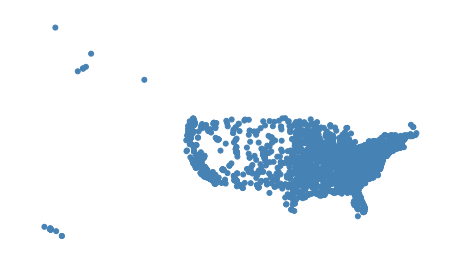

In [26]:
gplt.pointplot(geo_institutions)

In [28]:
ax = gplt.choropleth(working_gdf, projection=gcrs.WebMercator(), hue='share_underrepresented', figsize=(12,12))
gplt.pointplot(geo_institutions, ax=ax, zorder=3, alpha=0.3, color='red', s=2)

AttributeError: 'DataFrame' object has no attribute 'total_bounds'

<Figure size 864x864 with 0 Axes>